# Airline passenger satisfacion 
---

<a id='index'></a>
## Index
   - [Machine learing](#machine-learning)
       - [1.1 LinearRegression](#linear_regression)
       - [1.2 LogisticRegression](#logistic_regression)
       - [1.3 Decision Tree](#decision_tree)
       - [1.4 Random Forest](#random_forest)
       - [1.5 KNearest Neighbors](#kneighbors)
       - [1.6 Naive Bayes](#naive_bayes)
       - [1.7 Stochastic Gradient Desent](#SGD)
       - [1.8 Support Vector Machine](#support_vector_machine)
       

https://analyticsindiamag.com/7-types-classification-algorithms/

## Import Relative Libraries

In [167]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn import svm

%config InlineBackend.figure_format = 'retina'

In [2]:
%%html
<style>
table {float:left}
</style>

## Importing Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Cleaning Data

In [4]:
pd.DataFrame({'Missing Value Train':train.isna().sum(), 'Missing Value Test':test.isna().sum() })

,Missing Value Train,Missing Value Test
Unnamed: 0,0,0
id,0,0
Gender,0,0
Customer Type,0,0
Age,0,0
Type of Travel,0,0
Class,0,0
Flight Distance,0,0
Inflight wifi service,0,0
Departure/Arrival time convenient,0,0


In [5]:
train.describe()['Arrival Delay in Minutes']

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [6]:
test.describe()['Arrival Delay in Minutes']

count    25893.000000
mean        14.740857
std         37.517539
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1115.000000
Name: Arrival Delay in Minutes, dtype: float64

In [7]:
def clean_data(df):
    # Since Unnamed: 0 and id columns are not significant so we drop it
    #df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
    df = df.drop(['Unnamed: 0', 'id'], axis=1)
    # The columns content 'white space' that might lead to error, so we replace ' ' with '_'
    df.columns = [x.replace(' ','_').lower() for x in df.columns]

    # check missing value
    df.isna().sum()

    # look into data in missvalues column
    df.arrival_delay_in_minutes.describe()

    # Fill na values in column 'Arrival Delay in Minutes' with Median
    df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median())
    
    return df

train_cleaned = clean_data(train)
test_cleaned = clean_data(test)



---
## Data Visualize

---
## Data visualization

### Observed satisfication distribution by <font color='blue'>Type of pessenger</font>

## Data Prepossessing

#### Data Transform

In [8]:
train_prepossessed = train_cleaned.copy()
# looking into data
train_prepossessed.describe(include='all')

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,NaN
std,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


There are many categorical variable that need to encode

#### Transform value in
*Gender*

|Value                   |Transform to|
|:----------------------:|-----------:|
|Female |           0|
|Male              |           1|


*Satisfaction*

|Value                   |Transform to|
|:----------------------:|-----------:|
|Neutral or dissatisfied |           0|
|Satisfied               |           1|


In [9]:
# We assume neutral = dissatisfied
# convert values in stat
def process_data(df):
    df['gender'] = df['gender'].replace({'Female':0, 'Male':1})
    df['customer_type'] = df['customer_type'].replace({'disloyal Customer':0, 'Loyal Customer':1})
    df['type_of_travel'] = df['type_of_travel'].replace({'Personal Travel':0, 'Business travel':1})
    df['class'] = df['class'].replace({'Eco':0, 'Eco Plus':1, 'Business':2})
    df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
    return df

train_processed = process_data(train_cleaned)
test_processed = process_data(test_cleaned)

#### Define features and target

In [10]:
features = ['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
target = ['satisfaction']

X_train = train_processed[features]
#y_train = train_processed[target].to_numpy()
y_train = train_processed[target].values.ravel()
X_test = test_processed[features]
#y_test = test_processed[target].to_numpy()
y_test = test_processed[target].values.ravel()

#### Standardize

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

---
<a id='machine-learning'></a>
## Machine learning

#### Build function to execute classification models that  yield:
    - Confusion matrix
    - ROC curve
    - return variables
        1. Model
        2. ROC_ AOC score
        3. Time it take for run model

In [187]:
def run_model(model, X_train, X_test, y_train, y_test):
    
    t0 = time.time()
    
    model.fit(X_train, y_train)

    plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, cmap='viridis', normalize='all')
    plt.title('Confusion matrix y_test/ y_predict_test')
    plot_roc_curve(estimator=model, X=X_test, y=y_test)
    plt.show()
    
    y_test_pred = model.predict(X_test)
    model_test_score = model.score(X_test, y_test)

    roc_auc_test_score = roc_auc_score(y_test, y_test_pred)
    
    print(f"{str(model)[0:-2]}")
    print(f"Accuracy: {model_test_score}")
    print(f"ROC_AUC: {roc_auc_test_score}")
    
    time_takken = time.time()-t0
    print(f"Time takken: {time_takken}")
    
    
    return model, roc_auc_test_score, time_takken

<a id='linear_regression'></a>
#### 1.1 LinearRegression

In [225]:
linear = LinearRegression()

In [226]:
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [227]:
linear.score(X_train_scaled, y_train)

0.5507524271063567

In [228]:
linear.score(X_test_scaled, y_test)

0.5484723424410418

Result show how underfit of LinearRegression do with classify target. We will neglect this model for now.

<a id='logistic_regression'></a>
#### 1.2 LogisticRegression

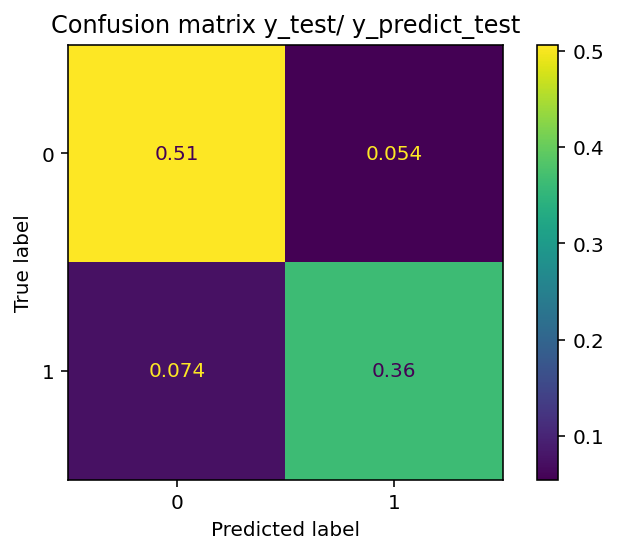

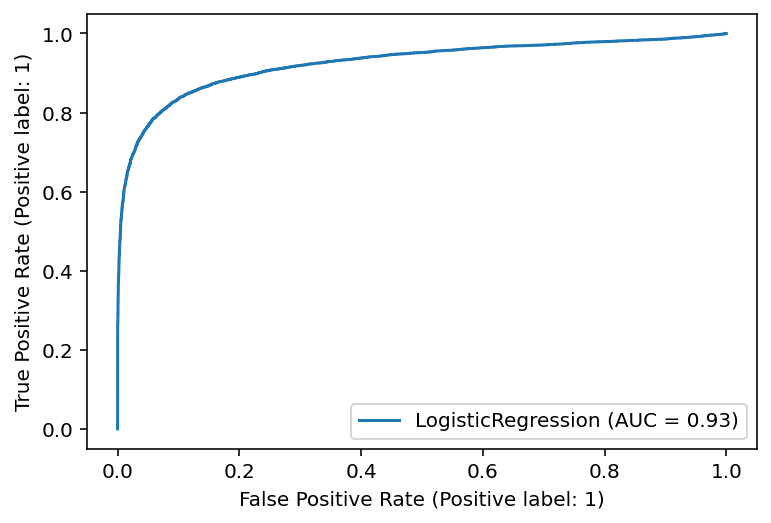

LogisticRegression
Accuracy (Test): 0.8716507545426547
ROC_AUC (Test): 0.8672686383639016
Time takken : 0.6150450706481934


In [181]:
model = LogisticRegression()
model_log, roc_auc_log, time_log = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='decision_tree'></a>
#### 1.3 Decision Tree

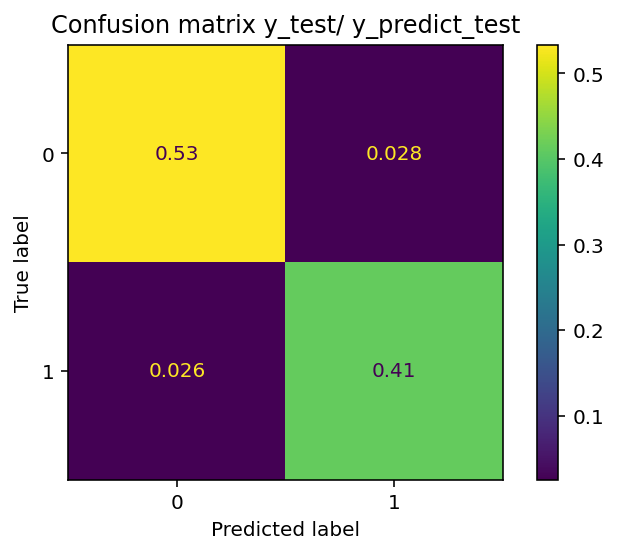

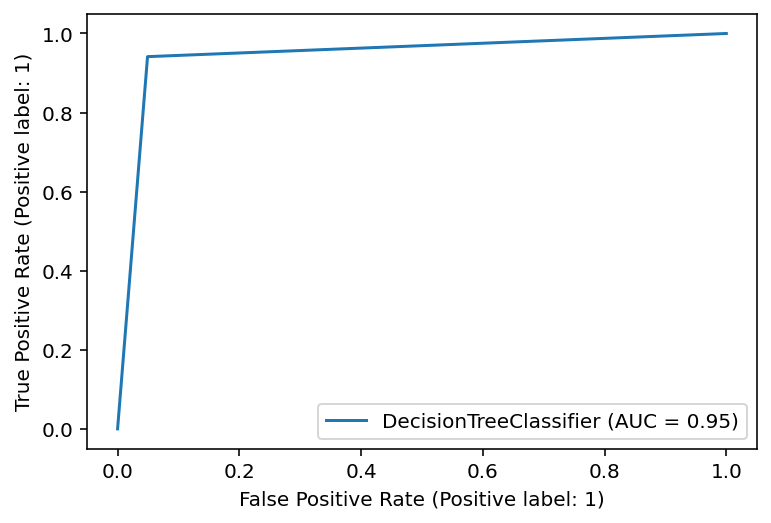

DecisionTreeClassifier
Accuracy (Test): 0.9466815522020327
ROC_AUC (Test): 0.9461091742179564
Time takken : 1.0870819091796875


In [182]:
model = DecisionTreeClassifier()
model_dt, roc_auc_dt, time_dt = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='random_forest'></a>
#### 1.4 Random forest

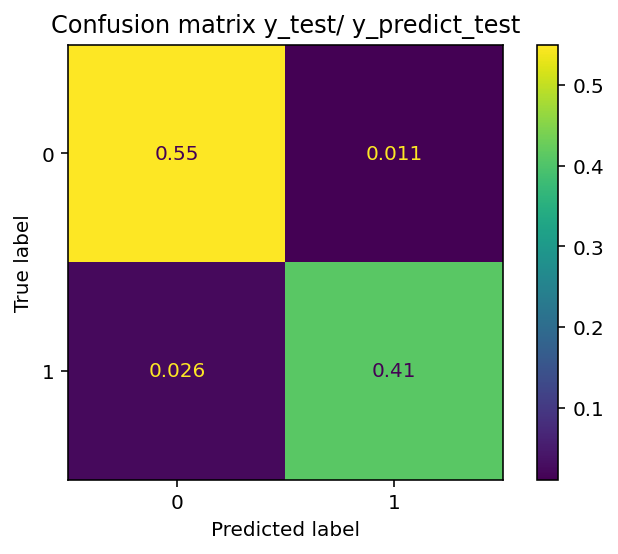

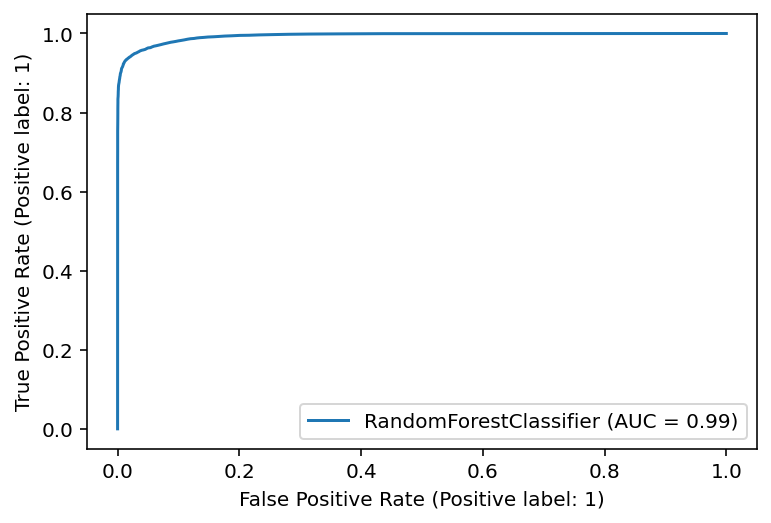

RandomForestClassifier
Accuracy (Test): 0.962580843855867
ROC_AUC (Test): 0.96020291002573
Time takken : 14.75507640838623


In [183]:
model = RandomForestClassifier()
model_rf, roc_auc_rf, time_rf= run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='kneighbors'></a>
#### 1.5 KNeighbors

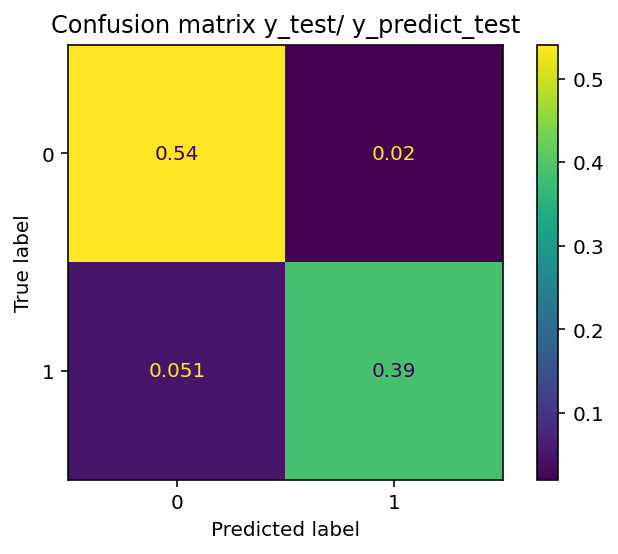

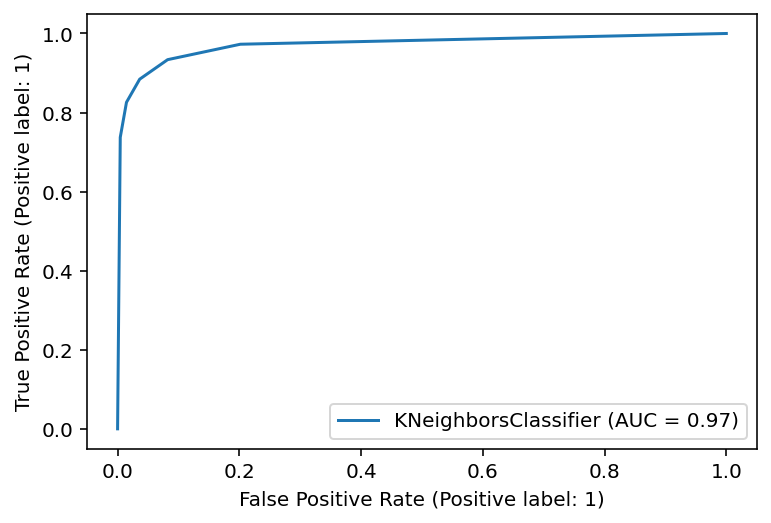

KNeighborsClassifier
Accuracy: 0.9288959039113027
ROC_AUC: 0.9240581873959729
Time takken: 212.17767119407654


In [188]:
params_kn = {}

model = KNeighborsClassifier(**params_kn)
model_kn, roc_auc_kn, time_kn= run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='naive_bayes'></a>
#### 1.6 Naive Bayes

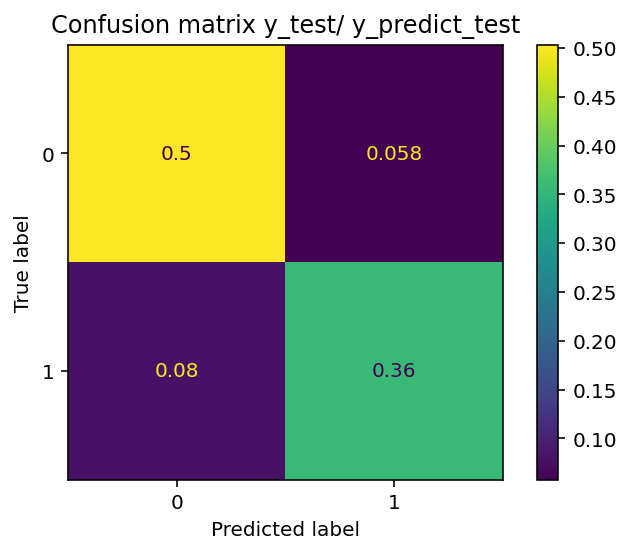

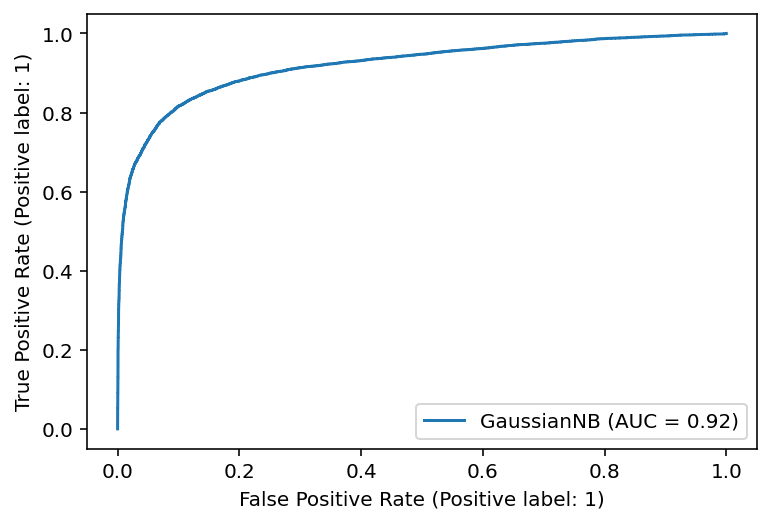

GaussianNB
Accuracy (Test): 0.8622959655066215
ROC_AUC (Test): 0.8574624371416897
Time takken : 0.5230419635772705


In [184]:
model = GaussianNB()
model_nb, roc_auc_nb, time_nb = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='SGD'></a>
#### 1.7 Stochastic Gradient Descent

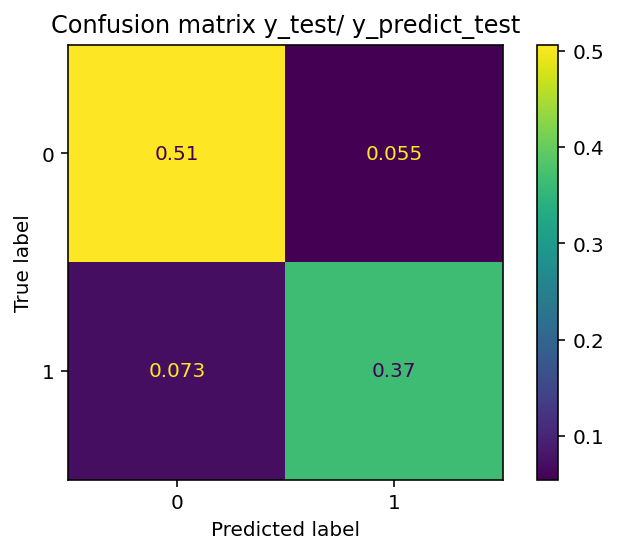

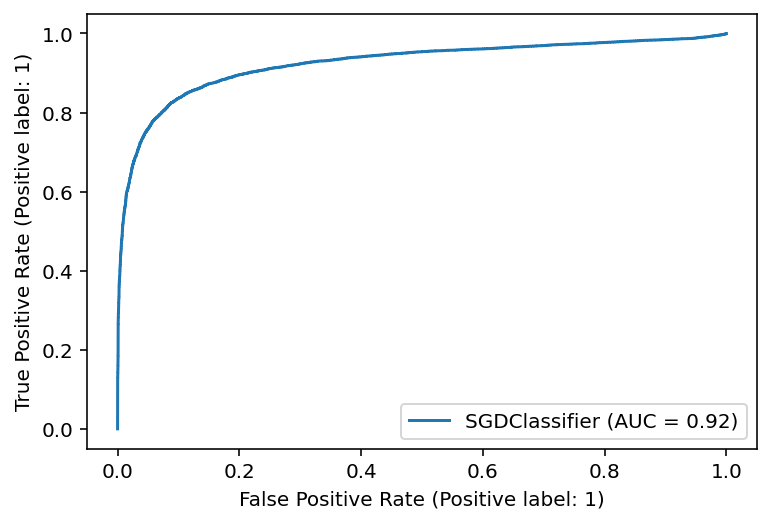

SGDClassifier
Accuracy: 0.8724591931013242
ROC_AUC: 0.8683611342026036
Time takken: 0.850045919418335


In [223]:
model = SGDClassifier()
model_sgd, roc_auc_sgd, time_sgd = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='support_vector_machine'></a>
#### 1.8 Support Vector Machine

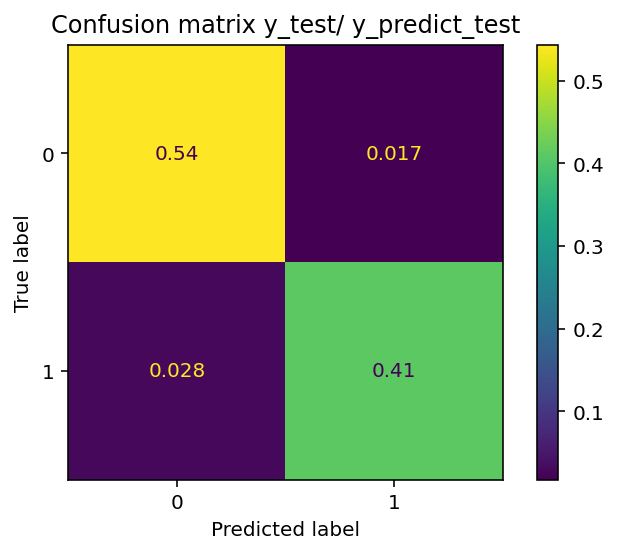

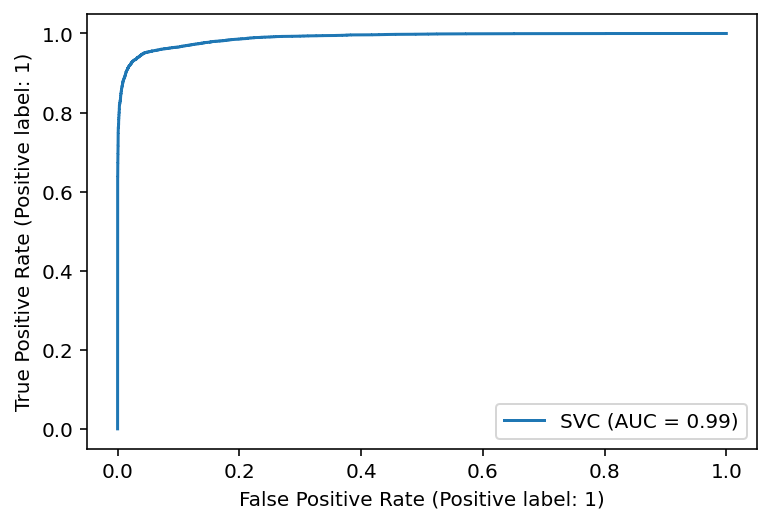

SVC
Accuracy: 0.9544194641207269
ROC_AUC: 0.9523950518967793
Time takken: 449.8215551376343


In [220]:
model = svm.SVC()
model_svm, roc_auc_svm, time_svm = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

In [224]:
model_names = [model_log, model_dt, model_rf, model_kn, model_nb, model_sgd, model_svm]
model_names = [(str(x)[:-2]) for x in model_names]

roc_auc_scores = [roc_auc_log, roc_auc_dt, roc_auc_rf, roc_auc_kn, roc_auc_nb, roc_auc_sgd, roc_auc_svm]
time_takkens = [time_log, time_dt, time_rf, time_kn, time_nb, time_sgd, time_svm]

model_scores = pd.DataFrame({'ROC': roc_auc_scores, 'Time': time_takkens}, index=model_names)
model_scores.sort_values('ROC')

,ROC,Time
GaussianNB,0.857462,0.523042
LogisticRegression,0.867269,0.615045
SGDClassifier,0.868361,0.850046
KNeighborsClassifier,0.924058,212.177671
DecisionTreeClassifier,0.946109,1.087082
SVC,0.952395,449.821555
RandomForestClassifier,0.960203,14.755076


## [Return to Index](#index)